Q31 アフィン変換（スキュー）

Fourier transform

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2

imori = cv2.imread("imori.jpg").astype(float)

def show_image(a):
    img_rgb = a[:,:,(2,1,0)]
    plt.imshow(img_rgb)
    plt.show()

def histgram(h_img):
    plt.hist(h_img.ravel(), bins=255, range=(0, 255), rwidth=0.7 )
    plt.show()

In [2]:
def AffineSkew(image,tx,ty,dx,dy):
    img = image.copy()
    h,w,_ = img.shape
    H = int(h+dy)
    W = int(w+dx)
    out = np.zeros((H,W,3))
    original = np.array([0,0])
    
    for i in range(H):
        for j in range(W):
            for k in range(3):
                original = 1/(1-(dx/h)*(dy/w))*np.array([[1,-dx/h],[-dy/w,1]])\
                                        @np.array([j,i]) - np.array([tx,ty])
                if 0 <= original[0] < w and 0 <= original[1] < h:
                    out[i,j,k] = img[int(original[1]),int(original[0]),k]

    return out.astype(int)

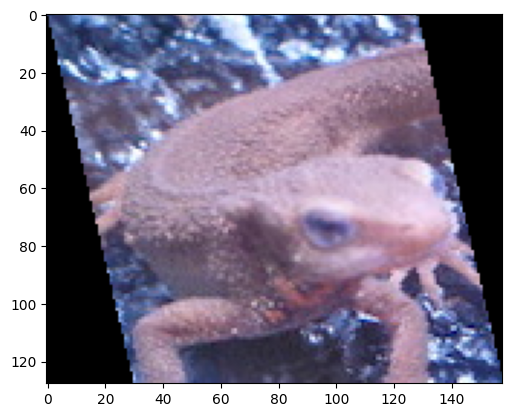

In [3]:
q31_img1 = AffineSkew(imori,0,0,30,0)
show_image(q31_img1)

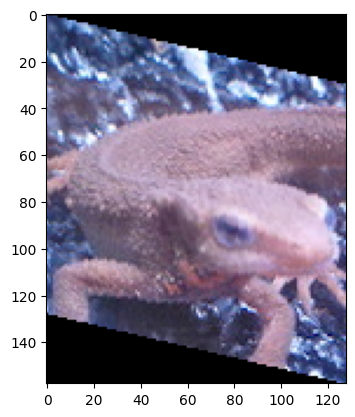

In [4]:
q31_img2 = AffineSkew(imori,0,0,0,30)
show_image(q31_img2)

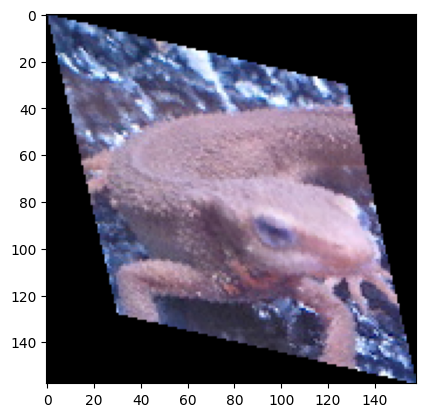

In [5]:
q31_img3 = AffineSkew(imori,0,0,30,30)
show_image(q31_img3)